In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from pmdarima import auto_arima

In [3]:
unemployment = pd.read_excel('data/unemployment.xls')

display(unemployment)

,period,value
0,1971-02-01,3.8
1,1971-03-01,3.9
2,1971-04-01,4.0
3,1971-05-01,4.1
4,1971-06-01,4.1
...,...,...
652,2025-06-01,4.7
653,2025-07-01,4.8
654,2025-08-01,5.0
655,2025-09-01,5.1


In [4]:
unemployment10 = unemployment[unemployment['period'] >= '2016-01-01']
display(unemployment10)

,period,value
539,2016-01-01,5.1
540,2016-02-01,5.1
541,2016-03-01,5.0
542,2016-04-01,4.9
543,2016-05-01,4.9
...,...,...
652,2025-06-01,4.7
653,2025-07-01,4.8
654,2025-08-01,5.0
655,2025-09-01,5.1


In [5]:
unemployment10_model = auto_arima(unemployment10['value'], seasonal=True, m=12, suppress_warnings=True)
print(unemployment10_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  118
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 12)   Log Likelihood                 107.725
Date:                            Tue, 27 Jan 2026   AIC                           -201.450
Time:                                    23:27:16   BIC                           -182.056
Sample:                                         0   HQIC                          -193.576
                                            - 118                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2498      0.157      1.587      0.113      -0.059       0.558
ar.L1          0.9432      0.036   

In [6]:
unemployment10_forecast = unemployment10_model.predict(n_periods=14)
display(unemployment10_forecast)

657    5.093324
658    5.014820
659    4.975482
660    4.905165
661    4.844315
662    4.788921
663    4.791818
664    4.772688
665    4.750169
666    4.628711
667    4.588239
668    4.541742
669    4.540721
670    4.529060
dtype: float64

In [7]:
# Create unemployment10_total with original values and forecast
last_date = unemployment10['period'].iloc[-1]
forecast_dates = pd.date_range(start=last_date, periods=15, freq='MS')[1:]  # Start from next month

# Create dataframe with forecast data
forecast_df = pd.DataFrame({
    'period': forecast_dates,
    'value': unemployment10_forecast
})

# Combine original data with forecast
unemployment10_total = pd.concat([unemployment10, forecast_df], ignore_index=True)

display(unemployment10_total)

,period,value
0,2016-01-01,5.100000
1,2016-02-01,5.100000
2,2016-03-01,5.000000
3,2016-04-01,4.900000
4,2016-05-01,4.900000
...,...,...
127,2026-08-01,4.628711
128,2026-09-01,4.588239
129,2026-10-01,4.541742
130,2026-11-01,4.540721


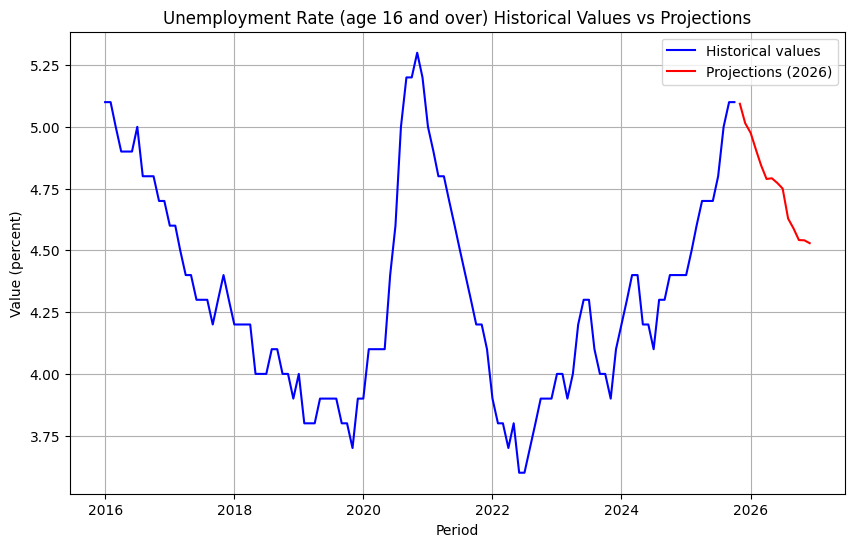

In [8]:
plt.figure(figsize=(10, 6))

# Split data: blue for up to 2025, red for 2026 projections
historical_data = unemployment10_total[unemployment10_total['period'] <= '2025-10-30']
projection_data = unemployment10_total[unemployment10_total['period'] > '2025-10-30']

plt.plot(historical_data['period'], historical_data['value'], label='Historical values', color='blue')
plt.plot(projection_data['period'], projection_data['value'], label='Projections (2026)', color='red')

plt.title('Unemployment Rate (age 16 and over) Historical Values vs Projections')
plt.xlabel('Period')
plt.ylabel('Value (percent)')
plt.legend()
plt.grid(True)

plt.savefig('img/unemployment10.png', dpi=300)
plt.show()